In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import BatchNormalization, Dropout
from keras.layers import Conv2DTranspose, UpSampling2D
from keras.layers import Dense, Activation, Reshape
from keras.models import Sequential

% matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

In [8]:
def keras_generator():
  # use tutorial from https://medium.com/towards-data-science/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0
  g = Sequential()
  dropout = 0.4
  depth = 256
  dim = 7
  # In: 100
  # Out: dim x dim x depth
  g.add(Dense(dim * dim * depth, input_dim=100))
  g.add(BatchNormalization(momentum=0.9))
  g.add(Activation('relu'))
  g.add(Reshape((dim, dim, depth)))
  g.add(Dropout(dropout))
  # In: dim x dim x depth
  # Out: 2*dim x 2*dim x depth/2
  g.add(UpSampling2D())
  g.add(Conv2DTranspose(int(depth / 2), 5, padding='same'))
  g.add(BatchNormalization(momentum=0.9))
  g.add(Activation('relu'))
  g.add(UpSampling2D())
  g.add(Conv2DTranspose(int(depth / 4), 5, padding='same'))
  g.add(BatchNormalization(momentum=0.9))
  g.add(Activation('relu'))
  # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
  g.add(Conv2DTranspose(1, 5, padding='same'))
  g.add(Activation('sigmoid'))
  g.summary()
  return g

In [9]:
noise = np.random.uniform(-1.0, 1.0, size=[256, 100])
g = keras_generator()
images = keras_generator().predict(noise)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_7 (Batch (None, 12544)             50176     
_________________________________________________________________
activation_9 (Activation)    (None, 12544)             0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 14, 14, 128)       819328    
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_10 (Batc (None, 12544)             50176     
_________________________________________________________________
activation_13 (Activation)   (None, 12544)             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 14, 14, 128)       819328    
__________

In [10]:
# Save the trained model to file
DIRECTORY = "./learned_model/"
MODEL_FILE = "generator.h5"

if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
g.save(os.path.join(DIRECTORY, MODEL_FILE))

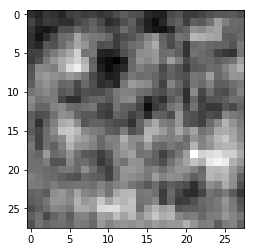

In [11]:
image = images[0, :, :, :]
image = np.reshape(image, [28, 28])
plt.imshow(image, cmap='gray')

In [12]:
image.shape

(28, 28)